# Clustering Five Financial Hub of the World according to essential venues

## - Nishant Kumar

In [1]:
# Installing libraries
!pip install beautifulsoup4
!pip install folium
!pip install geocoder
!pip install lxml
!pip install opencage

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [2]:
# importing libraries

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as re
import folium
import geocoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from opencage.geocoder import OpenCageGeocode
from sklearn import metrics
from scipy.spatial.distance import cdist

In [3]:
# creating dataframe:
dictionary = {'City':['Hong Kong', 'London', 'New York', 'Singapore', 'Tokyo', 'Toronto'],
              'Country':['China' ,'United Kingdom', 'USA', 'Singapore', 'Japan', 'Canada'],
             'Population':[7.5, 9.0, 8.4, 5.7, 9.2, 3.0]} # in millions
cities_df = pd.DataFrame(dictionary)
cities_df

,City,Country,Population
0,Hong Kong,China,7.5
1,London,United Kingdom,9.0
2,New York,USA,8.4
3,Singapore,Singapore,5.7
4,Tokyo,Japan,9.2
5,Toronto,Canada,3.0


In [4]:
# using opencage to get latitude and longitude
key = '514429be78784c619622c1a219387743'
geocoder = OpenCageGeocode(key)
for index, row in cities_df.iterrows():
    query = row['City'] + ', ' + row['Country']
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    cities_df.loc[index, 'Latitude'] = lat
    cities_df.loc[index, 'Longitude'] = long
cities_df

,City,Country,Population,Latitude,Longitude
0,Hong Kong,China,7.5,22.279328,114.162813
1,London,United Kingdom,9.0,51.507322,-0.127647
2,New York,USA,8.4,40.712728,-74.006015
3,Singapore,Singapore,5.7,1.357107,103.819499
4,Tokyo,Japan,9.2,35.682839,139.759455
5,Toronto,Canada,3.0,43.653482,-79.383935


In [5]:
# Map using folium library
latitude = 0
longitude = 0
world_map = folium.Map(location=[latitude, longitude], zoom_start=2)
# add markers to map
for lat, lng, label1, label2 in zip(cities_df['Latitude'], cities_df['Longitude'], cities_df['City'], cities_df['Country']):
    label = folium.Popup(str(label1) + ' (' + label2 + ')',parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
world_map

Text(0.5, 1.0, 'Population of Cities')

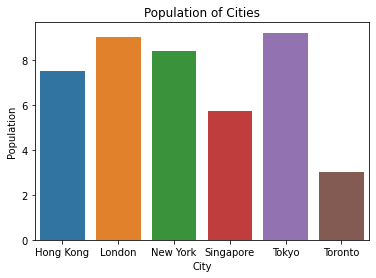

In [6]:
# visualizing population of cities
sns.barplot(x = 'City', y = 'Population', data = cities_df)
plt.title('Population of Cities')

In [7]:
# Defining Foursquare Credentials and Version
CLIENT_ID = '33ZY1DLZRO0F2X5H3OOIXBIS1XFY4DE54QFO2BUIOEBNDJNY' # your Foursquare ID
CLIENT_SECRET = 'O2ZC2KVZU1WG5GNN2TTFXGKAPUJ3PE3YTA250DGH3FTFKZ4M' # your Foursquare Secret
VERSION = '20210101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
cities_df_new = cities_df.copy()

Your credentails:
CLIENT_ID: 33ZY1DLZRO0F2X5H3OOIXBIS1XFY4DE54QFO2BUIOEBNDJNY
CLIENT_SECRET:O2ZC2KVZU1WG5GNN2TTFXGKAPUJ3PE3YTA250DGH3FTFKZ4M


In [8]:
radius = 20000
LIMIT = 500

venues = []

for lat, long, city, country, population in zip(cities_df_new['Latitude'], cities_df_new['Longitude'], cities_df_new['City'], cities_df_new['Country'], cities_df_new['Population']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(CLIENT_ID,
                                                                                                                               CLIENT_SECRET,
                                                                                                                               VERSION,
                                                                                                                               lat,
                                                                                                                               long,
                                                                                                                               radius,
                                                                                                                               LIMIT)
    
    results = re.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((city, country, population, lat, long,
                       venue['venue']['name'],
                       venue['venue']['location']['lat'],
                       venue['venue']['location']['lng'],
                       venue['venue']['categories'][0]['name']))

In [9]:
# Data frame of venues
venues_df = pd.DataFrame(venues, columns = ['City', 'Country', 'Population', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory'])
venues_df.head()

,City,Country,Population,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Hong Kong,China,7.5,22.279328,114.162813,Hong Kong Park Aviary (香港公園觀鳥園),22.277140,114.161399,Zoo
1,Hong Kong,China,7.5,22.279328,114.162813,The Upper House (奕居),22.277499,114.166323,Hotel
2,Hong Kong,China,7.5,22.279328,114.162813,The Asia Society Hong Kong Center (亞洲協會香港中心),22.276141,114.165263,Non-Profit
3,Hong Kong,China,7.5,22.279328,114.162813,The Murray Hong Kong (香港美利酒店),22.278127,114.160392,Hotel
4,Hong Kong,China,7.5,22.279328,114.162813,Hong Kong Park (香港公園),22.277700,114.161854,Park


In [10]:
venues_df['VenueCategory'].unique().tolist()

['Zoo',
 'Hotel',
 'Non-Profit',
 'Park',
 'Steakhouse',
 'Dim Sum Restaurant',
 'Cantonese Restaurant',
 'Pakistani Restaurant',
 'Italian Restaurant',
 'Athletics & Sports',
 'Café',
 'Thai Restaurant',
 'Yoga Studio',
 'Trail',
 'Dumpling Restaurant',
 'Bakery',
 'Gym / Fitness Center',
 'Japanese Restaurant',
 'Art Museum',
 'Clothing Store',
 'Scenic Lookout',
 'Speakeasy',
 'Shopping Mall',
 'Electronics Store',
 'Chinese Restaurant',
 'Scandinavian Restaurant',
 'Arts & Crafts Store',
 'Wine Bar',
 'Bar',
 'Supermarket',
 'Beer Store',
 'French Restaurant',
 'Coffee Shop',
 'Furniture / Home Store',
 'Massage Studio',
 'Club House',
 'Sushi Restaurant',
 'Hotel Bar',
 'Mountain',
 'Vietnamese Restaurant',
 'Performing Arts Venue',
 'Cocktail Bar',
 'Dessert Shop',
 'Tapas Restaurant',
 'Cosmetics Shop',
 'Bookstore',
 'Juice Bar',
 'Gourmet Shop',
 'Soba Restaurant',
 'Miscellaneous Shop',
 'Restaurant',
 'BBQ Joint',
 'Art Gallery',
 'Snack Place',
 'Multiplex',
 'Garden',
 'Pl

In [11]:
# creating essential list
essential = ['Zoo',
 'Hotel',
 'Park',
 'Athletics & Sports',
 'Café',
 'Yoga Studio',
 'Bakery',
 'Gym / Fitness Center',
 'Art Museum',
 'Clothing Store',
 'Scenic Lookout',
 'Speakeasy',
 'Shopping Mall',
 'Electronics Store',
 'Arts & Crafts Store',
 'Wine Bar',
 'Bar',
 'Supermarket',
 'Coffee Shop',
 'Furniture / Home Store',
 'Massage Studio',
 'Club House',
 'Mountain',
 'Performing Arts Venue',
 'Dessert Shop',
 'Cosmetics Shop',
 'Bookstore',
 'Juice Bar',
 'Gourmet Shop',
 'Miscellaneous Shop',
 'Restaurant',
 'Art Gallery',
 'Snack Place',
 'Multiplex',
 'Garden',
 'Plaza',
 'Event Space',
 'Shopping Plaza',
 'Opera House',
 'Monument / Landmark',
 'Department Store',
 'Theater',
 'Pedestrian Plaza',
 'History Museum',
 'Lounge',
 'Grocery Store',
 'Food Court',
 'Market',
 'Concert Hall',
 'Memorial Site',
 'Playground',
 'Bridge',
 'Beach',
 'Soccer Field',
 'Stationery Store',
 'Cycle Studio',
 'Track',
 'Movie Theater',
 'Bike Shop',
 'Historic Site',
 'Outdoors & Recreation',
 'Zoo Exhibit',
 'Museum',
 'Gym',
 'Buffet',
 'Pet Store',
 'Bed & Breakfast',
 'Shrine',
 'Pet Café',
 'Nightclub',
 'Buddhist Temple',
 'Hostel',
 'Science Museum',
 'Neighborhood',
 'Record Shop',
 'Food Truck',
 'Diner',
 'Sporting Goods Shop',
 'Lake',
 'Liquor Store',
 'Music School',
 'Harbor / Marina']

In [12]:
# one hot encoding
cities_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
cities_onehot['City'] = venues_df['City'] 
cities_onehot['Country'] = venues_df['Country'] 
cities_onehot['Population'] = venues_df['Population'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(cities_onehot.columns[-3:]) + list(cities_onehot.columns[:-3])
cities_onehot = cities_onehot[fixed_columns]

print(cities_onehot.shape)
cities_onehot.head()

(600, 173)


,City,Country,Population,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bagel Shop,...,Vietnamese Restaurant,Wagashi Place,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Hong Kong,China,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Hong Kong,China,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hong Kong,China,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hong Kong,China,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hong Kong,China,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# grouping dataframe according to city and country
cities_onehot = cities_onehot[['City', 'Country','Population'] + essential]
cities_grouped = cities_onehot[['City', 'Country','Population'] + essential].groupby(['City','Country']).mean().reset_index()
cities_grouped

,City,Country,Population,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,...,Science Museum,Neighborhood,Record Shop,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina
0,Hong Kong,China,7.5,0.01,0.14,0.04,0.01,0.02,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,London,United Kingdom,9.0,0.00,0.10,0.09,0.00,0.02,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,New York,USA,8.4,0.00,0.02,0.13,0.00,0.00,0.01,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Singapore,Singapore,5.7,0.01,0.14,0.06,0.00,0.02,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Tokyo,Japan,9.2,0.00,0.06,0.02,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Toronto,Canada,3.0,0.00,0.03,0.12,0.01,0.05,0.00,0.05,...,0.00,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01


In [14]:
# grouping dataframe according to city and country and counting
category_count = cities_onehot[['City', 'Country','Population'] + essential].groupby(['City','Country']).sum().reset_index()
category_count

,City,Country,Population,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,...,Science Museum,Neighborhood,Record Shop,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina
0,Hong Kong,China,750.0,1,14,4,1,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1,London,United Kingdom,900.0,0,10,9,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,New York,USA,840.0,0,2,13,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
3,Singapore,Singapore,570.0,1,14,6,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Tokyo,Japan,920.0,0,6,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5,Toronto,Canada,300.0,0,3,12,1,5,0,5,...,0,1,1,1,2,1,1,1,1,1


In [15]:
category_total = category_count[essential].sum(axis = 0).to_frame().reset_index()
category_total.columns = ['Venue', 'Count']
category_total

,Venue,Count
0,Zoo,2
1,Hotel,49
2,Park,46
3,Athletics & Sports,2
4,Café,12
...,...,...
77,Sporting Goods Shop,1
78,Lake,1
79,Liquor Store,1
80,Music School,1


Text(0.5, 1.0, 'Venue Count')

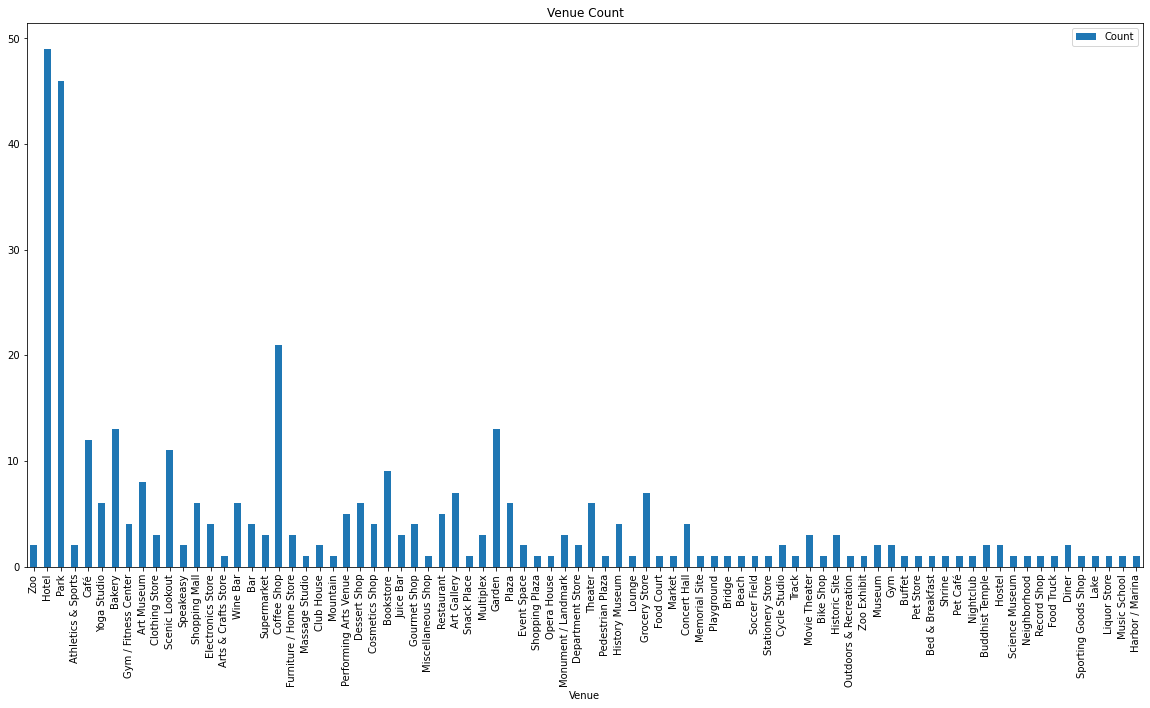

In [16]:
# plotting category
category_total.plot(kind = 'bar',x = 'Venue', rot = 90, figsize = (20,10))
plt.title('Venue Count')

In [17]:
cities_count = pd.concat((category_count['City'],category_count[essential].sum(axis = 1).to_frame()), axis = 1)
cities_count.columns = ['City', 'Count']
cities_count

,City,Count
0,Hong Kong,65
1,London,66
2,New York,55
3,Singapore,60
4,Tokyo,39
5,Toronto,69


In [18]:
dataframe = cities_count.copy()
dataframe['Density'] = pd.DataFrame(cities_count['Count'].to_numpy() / cities_grouped['Population'].to_numpy())
dataframe

,City,Count,Density
0,Hong Kong,65,8.666667
1,London,66,7.333333
2,New York,55,6.547619
3,Singapore,60,10.526316
4,Tokyo,39,4.239130
5,Toronto,69,23.000000


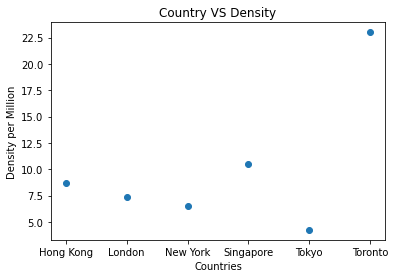

In [19]:
# plotting counties vs density
plt.scatter(x = dataframe.City, y = dataframe.Density)
plt.xlabel("Countries")
plt.ylabel("Density per Million")
plt.title('Country VS Density')
plt.show()

Text(0.5, 1.0, 'City wise Venue Count')

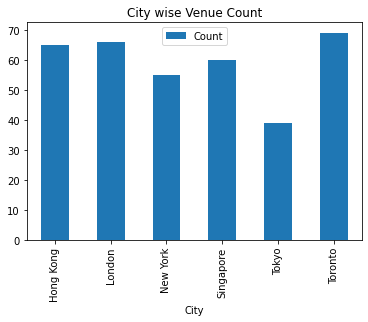

In [20]:
# plotting count
cities_count.plot.bar(y = 'Count', x = 'City')
plt.title('City wise Venue Count')

In [21]:
cities_dummy = cities_onehot.copy()

In [22]:
dataframe_density = pd.DataFrame((cities_dummy[essential].to_numpy() / np.resize((cities_dummy['Population'].to_numpy()),(600,1))), columns = essential)
dataframe_density = pd.concat((cities_onehot['City'], dataframe_density), axis = 1).groupby(['City']).sum().reset_index()
dataframe_density

,City,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,...,Science Museum,Neighborhood,Record Shop,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina
0,Hong Kong,0.133333,1.866667,0.533333,0.133333,0.266667,0.400000,0.400000,0.400000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,London,0.000000,1.111111,1.000000,0.000000,0.222222,0.111111,0.111111,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,New York,0.000000,0.238095,1.547619,0.000000,0.000000,0.119048,0.476190,0.119048,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Singapore,0.175439,2.456140,1.052632,0.000000,0.350877,0.175439,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tokyo,0.000000,0.652174,0.217391,0.000000,0.108696,0.000000,0.000000,0.000000,0.543478,...,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Toronto,0.000000,1.000000,4.000000,0.333333,1.666667,0.000000,1.666667,0.000000,0.000000,...,0.000000,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333


In [23]:
dataframe_density.describe()

,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,Clothing Store,...,Science Museum,Neighborhood,Record Shop,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.051462,1.220698,1.391829,0.077778,0.435855,0.134266,0.442328,0.086508,0.149839,0.107018,...,0.018116,0.055556,0.055556,0.055556,0.111111,0.055556,0.055556,0.055556,0.055556,0.055556
std,0.080829,0.811546,1.357330,0.136083,0.615367,0.147738,0.632923,0.160792,0.213457,0.134871,...,0.044375,0.136083,0.136083,0.136083,0.272166,0.136083,0.136083,0.136083,0.136083,0.136083
min,0.000000,0.238095,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.739130,0.650000,0.000000,0.137077,0.027778,0.027778,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.055556,1.026316,0.000000,0.244444,0.115079,0.255556,0.000000,0.066667,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.100000,1.677778,1.423872,0.100000,0.329825,0.161341,0.457143,0.089286,0.200000,0.164912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.175439,2.456140,4.000000,0.333333,1.666667,0.400000,1.666667,0.400000,0.543478,0.333333,...,0.108696,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333


In [24]:
df = dataframe_density.copy()

In [25]:
# Clustering using K-Means
# set number of clusters
dataframe_density = dataframe_density.drop(['City'], axis = 1)
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dataframe_density)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 0, 2, 0, 1], dtype=int32)

In [26]:
df['K Means Label'] = kmeans.labels_
df['Latitude'] = cities_df['Latitude'].to_numpy().tolist()
df['Longitude'] = cities_df['Longitude'].to_numpy().tolist()
df

,City,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,...,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina,K Means Label,Latitude,Longitude
0,Hong Kong,0.133333,1.866667,0.533333,0.133333,0.266667,0.400000,0.400000,0.400000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,22.279328,114.162813
1,London,0.000000,1.111111,1.000000,0.000000,0.222222,0.111111,0.111111,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,51.507322,-0.127647
2,New York,0.000000,0.238095,1.547619,0.000000,0.000000,0.119048,0.476190,0.119048,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,40.712728,-74.006015
3,Singapore,0.175439,2.456140,1.052632,0.000000,0.350877,0.175439,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.357107,103.819499
4,Tokyo,0.000000,0.652174,0.217391,0.000000,0.108696,0.000000,0.000000,0.000000,0.543478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,35.682839,139.759455
5,Toronto,0.000000,1.000000,4.000000,0.333333,1.666667,0.000000,1.666667,0.000000,0.000000,...,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,1,43.653482,-79.383935


In [27]:
# Map using folium library
latitude = 0
longitude = 0
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

rainbow = ['red', 'yellow', 'green']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['City'], df['K Means Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finding best value of K

In [28]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 5)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(dataframe_density)
    kmeanModel.fit(dataframe_density)
 
    distortions.append(sum(np.min(cdist(dataframe_density, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dataframe_density.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(dataframe_density, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / dataframe_density.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.0719659132045654
2 : 1.0158561689952914
3 : 0.7093924517067259
4 : 0.47717231400477295


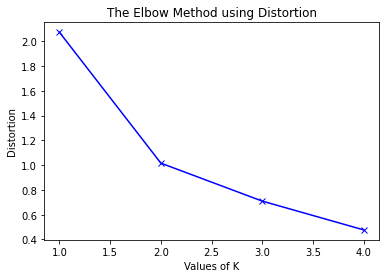

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Clusters:

In [31]:
# cluster 0
df[df['K Means Label'] == 0]

,City,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,...,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina,K Means Label,Latitude,Longitude
1,London,0.0,1.111111,1.000000,0.0,0.222222,0.111111,0.111111,0.000000,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51.507322,-0.127647
2,New York,0.0,0.238095,1.547619,0.0,0.000000,0.119048,0.476190,0.119048,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40.712728,-74.006015
4,Tokyo,0.0,0.652174,0.217391,0.0,0.108696,0.000000,0.000000,0.000000,0.543478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,35.682839,139.759455


In [32]:
# cluster 1
df[df['K Means Label'] == 1]

,City,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,...,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina,K Means Label,Latitude,Longitude
5,Toronto,0.0,1.0,4.0,0.333333,1.666667,0.0,1.666667,0.0,0.0,...,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,1,43.653482,-79.383935


In [33]:
# cluster 2
df[df['K Means Label'] == 2]

,City,Zoo,Hotel,Park,Athletics & Sports,Café,Yoga Studio,Bakery,Gym / Fitness Center,Art Museum,...,Food Truck,Diner,Sporting Goods Shop,Lake,Liquor Store,Music School,Harbor / Marina,K Means Label,Latitude,Longitude
0,Hong Kong,0.133333,1.866667,0.533333,0.133333,0.266667,0.400000,0.4,0.4,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,22.279328,114.162813
3,Singapore,0.175439,2.456140,1.052632,0.000000,0.350877,0.175439,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.357107,103.819499


### Conclusion:
It can be clearly concluded that cluster 1 which have low population and high density of essential services should be the choice for any individual planning to relocate. Hong Kong and Singapore have similar features and thus are clustered in cluster 2, while London, New York and Tokyo are clustered in to cluster 0.